In [17]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

# Sampling Variation

Probability sampling, also known as scientific sampling, uses a chance mechanism, such as drawing indistinguishable marbles from an urn, to select a sample from the frame. The use of randomness in the selection process enables us to calculate the variation in our sample, e.g., we can compute the chance that we draw a particular sample. We demonstrate these calculations with the most basic sampling method, the Simple Random Sample (SRS), and then introduce an extension of the SRS, stratified sampling. To explain both sampling methods, we use a small population of $7$ individuals.


## Simple Random Sample (SRS)

To take a simple random sample of $3$ from the population of $7$: we write a label on each marble  ($A - G$), place all the marbles in an urn, mix them well, and draw $3$ without looking and without replacement between draws. All of the the possible samples we could get are listed here: 

$$ABC ~~ ABD ~~ ABE ~~ ABF ~~ ABG ~~ ACD ~~ ACE \\ ACF ~~ ACG ~~ ADE ~~ ADF ~~ ADG ~~ AEF ~~ AEG \\ AFG ~~ BCD ~~ BCE ~~ BCF ~~ BCG ~~ BDE ~~ BDF \\ BDG ~~ BEF ~~ BEG ~~BFG ~~CDE ~~ CDF ~~ CDG \\ CEF ~~ CEG ~~ CFG ~~ DEF ~~ DEG ~~ DFG ~~ EFG  $$

There are $35$  unique samples of $3$ from our population of $7$. By design, each of these $35$ samples is equally likely to be chosen (the marbles are indistinguishable and well mixed) so the chance of any particular sample is $1/35$. In other words,  

$${\mathbb{P}}(ABC) = {\mathbb{P}}(\textrm{ABD}) = \cdots = {\mathbb{P}}(\textrm{EFG}) = \frac{1}{35}. $$

Note that we use the special symbol ${\mathbb{P}}$ to stand for "probability" or "chance". 



We can use this chance mechanism to answer questions about the composition of a sample. For example, to find the chance that unit $A$ is in the sample, we can count up all the samples that contain $A$. There are 15 of them so the chance is:

$${\mathbb{P}}(\textrm{A is in the sample}) = \frac{15}{35} = \frac{3}{7}.$$

 And by symmetry, we have:

$${\mathbb{P}}(\textrm{A in sample}) = {\mathbb{P}}(\textrm{B in sample}) = \cdots = {\mathbb{P}}(\textrm{G in sample}) = \frac {3}{7}.$$

Or, you can count them to convince yourself that each unit has an equal chance of being in the sample. We now have a more formal definition of "representative data" that is very useful. Note: If you are familiar with counting arguments and factorials, you can compute the number of possible samples as follows:

$${7 \choose 3} = \frac {7!} {3!~4!} = 35.$$

Many people mistakingly think that the defining property of a SRS is that every unit has an equal chance of being in the sample. However, this is not the case. A SRS of $n$ units from a population of $N$ means that every possible subset of $n$ units from $N$ has the same chance of being selected. 



## **Stratified Sampling**

In stratified sampling, we divide the population into non-overlapping groups, called strata (one group is called a stratum and more than one are strata), and then take a simple random sample from each.  This is like having an urn for each stratum and drawing marbles from each urn, independently. The strata do not have to be the same size, and we need not take the same number of units from each stratum.

For example, we can divide our tiny population of $7$ individuals into $2$ strata as follows:

$$\textrm{Stratum}~1: \{A, B, C, D \} \\ \textrm{Stratum}~2: \{ E, F, G \}$$

Suppose we want to take a sample of size $2$ from the first stratum and a sample of $1$ from the smaller stratum.  All together, we have a sample of size $3$ from the population. This sampling scheme gives us the following possible samples

$$ABE~~ABF~~ABG~~ACE~~ACF~~ACG\\ADE~~ADF~~ADG~~BCE~~BCF~~BCG\\BDE~~BDF~~BDG~~CDE~~CDF~~CDG$$



Each of these samples is equally likely, i.e., 

$${\mathbb{P}}\left(ABE\right) = {\mathbb{P}}\left(CDG\right) = \frac{1}{18}.$$

 Notice that not all triples are possible in this sampling scheme, e.g.,

$${\mathbb{P}}\left(\textrm{AEF}\right) = 0,$$

since only one unit is chosen from the second stratum. 



Again, we can compute the probability that unit $A$ is in our sample by counting up all of the occurrences of $A$ in the 18 samples:

$${\mathbb{P}}\left(A \textrm{ in sample}\right) = \frac{9}{18} = \frac{1}{2}.$$

This is just the chance that $A$ is chosen from the first stratum, i.e., $2/4$ or $1/2$. Not all units have the same chance of appearing in the sample, e.g.,

$${\mathbb{P}}\left(F \textrm{ in sample}\right) = \frac{6}{18} = {\mathbb{P}}\left(F \textrm{ chosen from stratum 2} \right)=\frac{1}{3}.$$



Stratified sampling is often used when some subgroups of the population are more heterogenous than others, in which case we take larger samples from the more variable strata.  Stratified sampling allows the researcher to ensure that subgroups of the population are well-represented in the sample without using human judgement to select the individuals. This approach to sampling can improve the accuracy of a sample. Despite not all samples of $3$ are possible in these sampling scheme,  each stratum's sample is representative of its stratum, and we can use our knowledge of the sampling scheme to combine the samples in a representative way through weighting. This topic is addressed in Chapter XX. 

The simple random sample is at the core of many probability sampling schemes. For example, most government surveys use complex sampling schemes that involve multi-stages of sampling from clusters (see Exercise X) and strata. It's crucial to keep these sampling schemes in mind when we compute summary statistics, make plots, and fit models for otherwise, our analysis could be flawed.

**TODO: cross-refs**

## Sampling Distributions

Probability sampling induces a sampling distribution on any statistic that we calculate from our sample. To explain the concept, we return to our small population of $7$, and this time give each unit a value that we want to measure. Suppose that these $7$ units are pets, $4$ dogs and $3$ cats. From our sample, we might summarize our findings with, say, the proportion of dogs in our sample.  Each of our possible samples (remember, there are 35) gives us a summary statistic, a sample proportion. If units $A,B,C,D$ are the dogs and $E,F,G$ the cats, then for each sample, we get the following sample proportion of dogs:

[Possible Samples and Corresponding Proportions](https://www.notion.so/6b310f7a04414e81af629797e5ff244b)


This table can be collapsed into a probability distribution table for the sample proportions.  There are 4 samples that give us all dogs (sample proportion of 1). These are: $ABC$ , $ABD$, $ACD$, $BCD$, so the chance of observing a sample proportion of $1$ is $4/35$.  The probability distribution table below summaries these possible values and their chances.

[Probability Distribution Table](https://www.notion.so/6e737af3d90b4fc189263b8c38449de5)


**TODO: convert tables to LaTeX or markdown since Notion doesn't export them well**


We also can display this probability distribution with a probability histogram.  And we can find the expected outcome from the SRS, with the following reasoning: 

$${\mathbb{E}}(\textrm{sample proportion}) = 1 \times \frac{4}{35} + \frac{2}{3}\times \frac{18}{35} + \frac{1}{3} \times \frac{12}{35} + 0 \times \frac{1}{35}\\ = \frac{20}{35} \\ =~ \frac{4}{7}$$



The *expected sample proportion*, matches the proportion of dogs in the population. Further, we can find the standard error of the sample proportion, i.e., the typical deviation of the sample proportion from the expectation, $4/7$. That is, we compute the root mean square error of the sample proportion as follows:

$${\mathbb{SE}} = \sqrt{(1-\frac{4}{7})^2\times \frac{4}{35} + (\frac{2}{3}-\frac{4}{7})^2\times \frac{18}{35} +(\frac{1}{3}-\frac{4}{7})^2\times \frac{12}{35} +(0-\frac{4}{7})^2\times \frac{1}{35} } \\ \approx 0.233$$



The SE, also called the margin of error, indicates that even though our sample proportion has a expected value that matches $4/7$, it is likely to be around $0.23$ away from $4/7$. 

While the mathematics of these calculations are quite simple, we can approximate them through a simulation study. To do this, we take samples of size $3$ from our population over and over, say 100,000 times.  For each sample, we calculate the proportion of dogs. So, we have 100,000 simulated sample proportions, and the probability distribution table tells us that roughly $4/35$ of these $100,000$ sample proportions should $1$, $18/35$ of them will be $2/3$, ..., and about 2,800 of the samples will be a sample with only cats ($100,000/35=2857$).

- A table of the simulated proportions should look like the probability distribution above
- The average of the simulated proportions should be close to the expected proportion, $4/7 \approx 0.57$ .
- The standard deviation of the simulated proportions should be close to the standard error, about $0.23$.

We show the results of such a simulation below.


## Simulating Sampling Error

### The Urn Model

Our urn has 7 marbles, one for each pet.
Since we care only about whether a pet is a dog or cat, we can label each marble as 'dog' or 'cat',
rather than A through G. 
We create this urn as an array. 

In [18]:
urn = ['dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat']

Then we draw 3 marbles from our urn without replacement between draws using numpy's 'random.choice' as follows. 

In [19]:
np.random.choice(urn, size=3, replace=False)

array(['cat', 'cat', 'dog'], dtype='<U3')

We can keep sampling from our urn, e.g., below we take 10 samples from the urn: 

In [20]:
[np.random.choice(urn, size = 3, replace = False) for i in range(10)] 

[array(['dog', 'dog', 'dog'], dtype='<U3'),
 array(['cat', 'dog', 'cat'], dtype='<U3'),
 array(['cat', 'dog', 'dog'], dtype='<U3'),
 array(['dog', 'cat', 'dog'], dtype='<U3'),
 array(['dog', 'cat', 'dog'], dtype='<U3'),
 array(['dog', 'dog', 'cat'], dtype='<U3'),
 array(['cat', 'cat', 'dog'], dtype='<U3'),
 array(['dog', 'cat', 'dog'], dtype='<U3'),
 array(['dog', 'cat', 'dog'], dtype='<U3'),
 array(['dog', 'dog', 'cat'], dtype='<U3')]

Since we simply want to count the number of dogs in the sample, it's easier if our urn contains 1s (for dogs) and 0s (for cats) so that we can sum the results of the 3 draws to get the number of dogs in the sample. 
That is, 

In [21]:
urn = [1, 1, 1, 1, 0, 0, 0]
sum(np.random.choice(urn, size=3, replace=False))/3

0.3333333333333333

For our simulation, we generate 100,000 samples, and compute the proportion of dogs in each.

In [22]:
simulations = [sum(np.random.choice(urn, size=3, replace=False))/3 for i in range(100000)] 

### Simulation Results

Let's study these 100,000 sample proportions. 
First, we compute the average value and the standard deviation of the 100,000 sample proportions,
and compare them to what the theory told us: the expected proportion is 4/7 or about 0.571, and 
the sampling error is about 0.233.

In [23]:
np.mean(simulations), np.std(simulations)

(0.57181, 0.2338161469331549)

These match quite closely.
We can also compare the fraction of the 100,000 values that are 0, 1/3, 2/3, and 1 and
make a histogram.

In [24]:
unique_els, counts_els = np.unique(np.array( simulations ), return_counts=True)

In [25]:
np.array((unique_els, counts_els/100000))

array([[0.  , 0.33, 0.67, 1.  ],
       [0.03, 0.34, 0.51, 0.12]])

Text(0.5, 0, 'Sample Proportion')

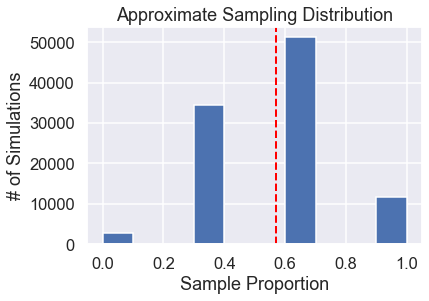

In [26]:
plt.hist(simulations)
plt.axvline(0.571, color='red', linestyle='dashed', linewidth=2)
plt.title('Approximate Sampling Distribution')
plt.ylabel('# of Simulations')
plt.xlabel('Sample Proportion')

The simulations closely match the theory we developed.
This simulation study does not *prove* the expected value of the chance outcome is 4/7 or that the chance a  sample has 2 dogs is 18/35. 
However, the simulation does support our earlier calculations, and  
in more complex settings a simulation study can offer valuable insights. 

### Common probability distributions

This version of the urn model, where we count the number of marbles of a certain type (in our case 'dog' marbles), is so common that there is a random chance process named for it: the hypergeometric. 
Instead of using `random.choice`, we can use `random.hypergeometric`, which is optimzed for the 0-1 urn and allows us to ask for 100,000 simulations in the call. 
For completeness, we repeat our simulation study, calculate the average and standard error, and display the empirical proportions.  

In [27]:
simulations_fast = np.random.hypergeometric(ngood=4, nbad=3, nsample=3, size=100000)

Note: we don't think that cats are bad; it's just a naming convention to call the type you want to count 'good' and the other 'bad'. 

In [28]:
np.mean(simulations_fast / 3)

0.5714933333333333

In [29]:
np.std(simulations_fast / 3)

0.23369931526548288

In [30]:
unique_els, counts_els = np.unique(np.array( simulations_fast ), return_counts=True)

In [31]:
np.array((unique_els, counts_els/100000))

array([[0.  , 1.  , 2.  , 3.  ],
       [0.03, 0.34, 0.51, 0.11]])

Text(0.5, 0, 'Sample Proportion')

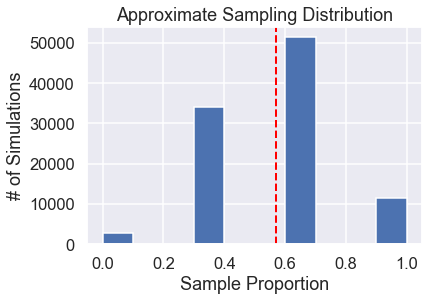

In [32]:
plt.hist(simulations_fast/3)
plt.axvline(0.57, color='red', linestyle='dashed', linewidth=2)
plt.title('Approximate Sampling Distribution')
plt.ylabel('# of Simulations')
plt.xlabel('Sample Proportion')

Perhaps the two most common probability distributions are those that arise from counting the number of 1s drawn from a 0-1 urn: drawing without replacement is the hypergeometric distribution and drawing with replacement is the binomial. 
We do not delve further into the study of named probability distributions. 
However, if possible, it's a good idea to use the functionality provided in a third party package for simulating from a named distribution, rather than writing a simulation entirely from scratch.  Others have developed efficient and accurate code.

Our approach in this book is to develop intuition based on simulation studies to understand the results of a chance process. However, we do formalize the notion of a probability distribution, expected value, and standard deviation in Section XX.

**TODO: cross-refs**

## Example: Election Polls, Bias, Variance, and Big Data

### Background

The US president is chosen by the Electoral College, not by popular vote. 
Each state is alotted a certan number of electoral college votes, as a function of their population, and
typically, whomever wins the popular vote in the state receives all of the electoral college votes for that state. 

In advance of the election, polls are conducted separately in all of the states.
The results help identify "battleground" states, and they are combined to predict the winner of the electoral college votes.
In 2016, pollsters correctly predicted the election outcome in 46 of the 50 states. 
For those 46 states Trump received 231 and Clinton received 232 electoral college votes.
The remaining 4 states, Florida, Michigan, Pennsylvania, and Wisconsin, accounted for a total of 75 votes, and 
whichever candidate received the majority of the electoral college votes in these states would win the election. 


The electoral margins in these four states were narrow, e.g., in Pennsylvania Trump received 48.18% and Clinton received 47.46% of the 6,165,478 votes cast in the state. 
Such narrow margins can make it hard to predict the outcome given the sample sizes that the polls used.

Many experts have studied the 2016 election results. 
According to the American Association for Public Opinion Research (AAPOR),
one online, opt-in poll adjusted their polling results for education but used only three broad categories 
(high school or less, some college, and college graduate). 
They found that had they separated out those with advanced degrees from those with college 
degrees, then they would have reduced Clinton’s margin by 0.5 percentage points. 
In other words, after the fact they were able to identify an education bias where highly educated voters tended to be more willing to participate in polls. This bias matters because these voters also tended to prefer Clinton over Trump.

Now that we know how people actually voted, we can carry out a simulation study that imitates the election polling under different scenarios to help develop intuition for accuracy, bias, and variance (see {cite}`grotenhuis2018`. 
We will simulate the polls for Pennsylvania under two scenarios: 

1. People surveyed didn't change their minds, didn't hide who they voted for, and were representative of those who voted on election day.
2. People with a higher education were more likely to respond, which led to a 0.5% bias for Clinton.

Our ultimate goal is to understand the chance that a poll incorrectly calls the election for Hillary Clinton even if our sample was collected with absolutely no bias, and when there is a small amount of non-response bias.

### Simulation Study of the Sampling Error


For the first scenario, we simulate a simple random sample (SRS) of the 6+m voters in Pennsylavania and
calculate Trump's lead over Clinton. 
We repeat this sample collection over and over, each time calculating Trump's lead, to get 
a sense of the different values a SRS might produce.

Our population consists of the votes cast for Trump, Clinton, and a third-party candidate.
We lump all of the third party candidates together because we are only interested in the difference between
votes cast for Trump and Clinton.

### The Urn Model

We can cast this problem in terms of an urn model as follows:

+ There are 6,165,478 marbles in the urn, one for each vote
+ Since we care only about whether the vote is for Clinton, Trump, or some other third party candidate, we can lump all third party candidates together and label each marble in one of three ways: Trump, Clinton, and Other.
+ The poll is a SRS of, say, 1500 marbles from the urn
+ We tally up the counts of the three types of marbles 

We begin by creating an urn that represents the votes cast on election day. 

In [33]:
proportions = np.array([0.4818, 0.4746, 1 - (0.4818 + 0.4746)])               
n = 1500
N = 6165478
votes = np.trunc(N * proportions)
votes

array([2970527., 2926135.,  268814.])

This version of the urn model is so common that there is a random chance process named for it, the multivariate hypergeometric. We can take a SRS and get our counts with the function call:

In [34]:
# I get errors trying to call this function so resorted to the multinomial below.
# Would like to update the code to the multivariate hypergeometric.
# np.random.multivariate_hypergeometric(votes, n)

In [35]:
np.random.multinomial(n, proportions)

array([729, 710,  61])

And, each time we call `np.random.multinomial` we get a different sample and counts, e.g.,

In [36]:
np.random.multinomial(n, proportions)

array([703, 720,  77])

We compute Trumnp's lead for each simulation, i.e., $(n_T - n_C)/n$, where $n_T$ are the number of Trump votes in the sample and $n_C$ the number for Clinton. If the lead is positive, then the sample shows a win for Trump.

We know the actual lead was, 0.4818 - 0.4746 =  0.0072, and to get a sense of the variation in the sampling process 
we can simulate the sampling process over and over and examine the values that we get in return. 
Below we simulate 100,000 simple random samples of 1500 voters from the state of Pennsylvania.  

In [37]:
def trump_advantage(n, proportions):
    sample_votes = np.random.multinomial(n, proportions)
    return (sample_votes[0] - sample_votes[1]) / n

In [38]:
simulations = [trump_advantage(n, proportions) for i in range(100000)] 

On average, the polling results show Trump with close to a 0.7% lead: 

In [39]:
np.mean(simulations)

0.0071331733333333345

However, many times the lead in the sample was negative, meaning Clinton was the winner for that sample of voters.
The histogram below shows the sampling distribution of Trump's advantage in Pennsylvania for a sample of 1500 voters. 
The vertical dashed line at 0 shows that more often than not, Trump is called, but there are many times when a sample 
shows Clinton in the lead.

Text(0.5, 0, 'Trump Lead in the Sample')

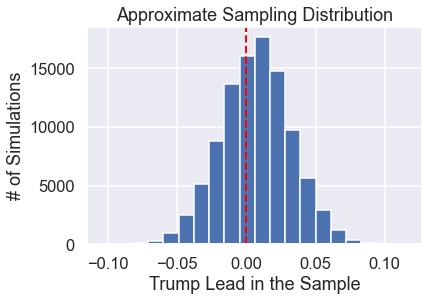

In [40]:
plt.hist(simulations, bins=20)
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.title('Approximate Sampling Distribution')
plt.ylabel('# of Simulations')
plt.xlabel('Trump Lead in the Sample')

In the 100,0000 simulated polls, we find Trump a victor about 60% of the time: 

In [41]:
np.count_nonzero(np.array(simulations) > 0) / 100000

0.60694

This number represents the chance that a given sample will correctly predict Trump's victory *even if the sample was collected with absoutely no bias*. In other words, even a non-biased sample will be wrong about 40% of the time. 


We have just studied the sampling error, and found how our predictions might look if there was no bias in our 
sampling process. Next we will see what happens when a little biasenters into the mix.

### Simulation Study of Selection Bias


"In a perfect world, polls sample from the population of voters, who would state their political preference perfectly clearly and then vote accordingly." {cite}`grotenhuis2018`

That's the simulation study that we just performed. 


It's difficult to control for every source of bias. We investigate here the effect of a small, education bias on the polling results. 
Specifically, we examine the impacts of the 0.5 percent bias in favor of Clinton that we described earlier. 

This bias essentially means that we see a distorted picture of voter preferences in our polls, where instead of 47.46 percent votes for Clinton, we have 47.96, and we have 48.18 - 0.5 = 47.68 percent for Trump. 
We adjust the proportions to reflect this bias: 

In [42]:
proportions_bias = [0.4818 - 0.005, 0.4747 + 0.005, 1 - (0.4818 + 0.4746) ]
proportions_bias

[0.4768, 0.4797, 0.04359999999999997]

Now, our simulations find Trump winning in about 45% of the samples.

In [43]:
simulations_bias = [trump_advantage(n, proportions_bias) for i in range(100000)] 

Text(0.5, 0, 'Trump Lead in the Sample')

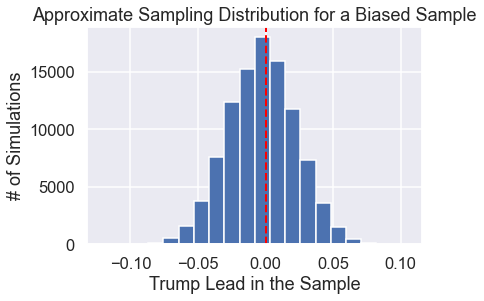

In [44]:
plt.hist(simulations_bias, bins=20)
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.title('Approximate Sampling Distribution for a Biased Sample') 
plt.ylabel('# of Simulations')
plt.xlabel('Trump Lead in the Sample')

In [45]:
np.count_nonzero(np.array(simulations_bias) > 0) / 100000

0.44911

Notice that the histograms from the two simulations are similar in shape. 
They are symmetric with reasonable length tails, i.e., they appear to roughly follow the normal curve.
The second histogram is shifted slightly to the left, which reflects the non-response bias we introduced.

###  Would increasing the sample size have helped?

With our simulation study we can get insight into the answer to this question. 
For example, we can try a sample size of 12,000 and run 100,000 simulations for both scenarios.

In [46]:
simulations_big = [trump_advantage(12000, proportions) for i in range(100000)] 
simulations_bias_big = [trump_advantage(12000, proportions_bias) for i in range(100000)] 

In [47]:
scenario_no_bias = np.count_nonzero(np.array(simulations_big) > 0) / 100000
scenario_bias = np.count_nonzero(np.array(simulations_bias_big) > 0) / 100000
print(scenario_no_bias, scenario_bias)

0.78947 0.37069


By analyzing over 4,000 polls for 600 state-level, gubernatorial, senatorial, and presidential elections, Shirani-Mehr et al found that on average these polls exhibited a bias of about 1.5 percentage points.

When the margin of victory is relatively small as it was in 2016, a larger sample size reduces the sampling error, but unfortunately, if there is bias, then the predictions are close to the biased estimate. If the bias pushes the prediction from one candidate (Trump) to another (Clinton), then we have a "surprise" upset. 

**TODO: citations**